In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
%matplotlib inline
!pip install lifetimes
!pip install jcopml

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes.utils import summary_data_from_transaction_data
from jcopml.plot import plot_missing_value

In [4]:
df = pd.read_csv("OnlineRetail.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

,missing_value,%
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135080,24.93
Country,0,0.00


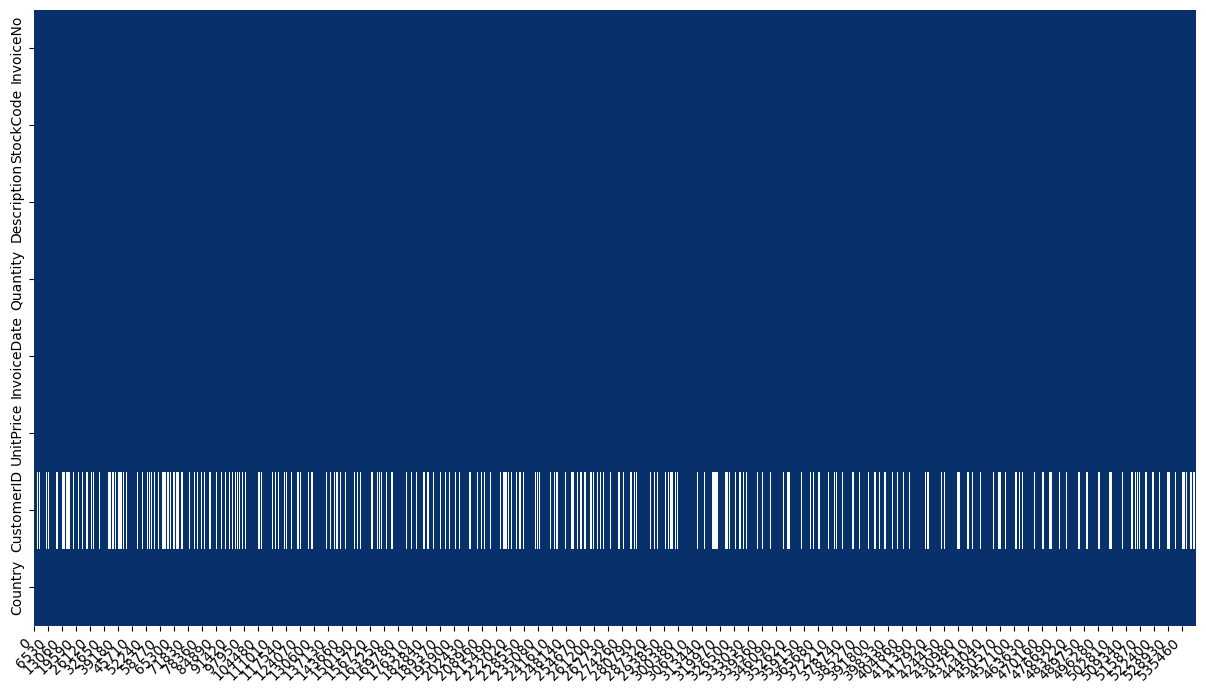

In [6]:
plot_missing_value(df, return_df = True)

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Outliers Quantity
q1_quan = df['Quantity'].quantile(0.25)
q3_quan = df['Quantity'].quantile(0.75)
iqr_quan = q3_quan - q1_quan
lb_quan = float(q1_quan) - (1.5 * iqr_quan)
ub_quan = float(q3_quan) + (1.5 * iqr_quan)

print('Q1 = {}'.format(q1_quan))
print('Q3 = {}'.format(q3_quan))
print('IQR = Q3 - Q1 = {}'.format(iqr_quan))
print('lower bound = Q1 - 1.5 * IQR = {}'.format(lb_quan))
print('upper bound = Q3 + 1.5 * IQR = {}'.format(ub_quan))

Q1 = 1.0
Q3 = 10.0
IQR = Q3 - Q1 = 9.0
lower bound = Q1 - 1.5 * IQR = -12.5
upper bound = Q3 + 1.5 * IQR = 23.5


In [9]:
# Outliers UnitPrice
q1_unit = df['UnitPrice'].quantile(0.25)
q3_unit = df['UnitPrice'].quantile(0.75)
iqr_unit = q3_unit - q1_unit 
lb_unit = float(q1_unit) - (1.5 * iqr_unit)
ub_unit = float(q3_unit) + (1.5 * iqr_unit)

print('Q1 = {}'.format(q1_unit))
print('Q3 = {}'.format(q3_unit))
print('IQR = Q3 - Q1 = {}'.format(iqr_unit))
print('lower bound = Q1 - 1.5 * IQR = {}'.format(lb_unit))
print('upper bound = Q1 - 1.5 * IQR = {}'.format(ub_unit))

Q1 = 1.25
Q3 = 4.13
IQR = Q3 - Q1 = 2.88
lower bound = Q1 - 1.5 * IQR = -3.0700000000000003
upper bound = Q1 - 1.5 * IQR = 8.45


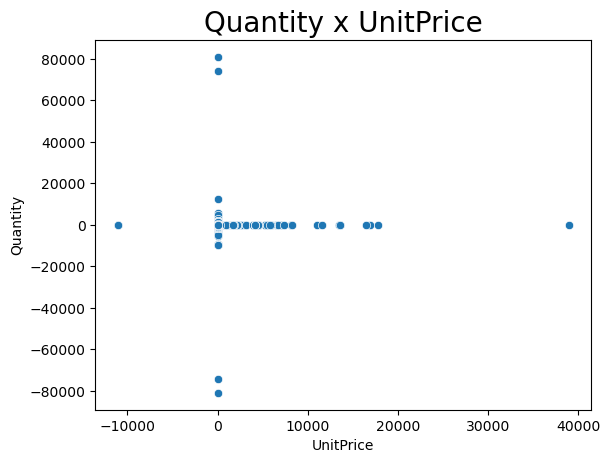

In [10]:
sns.scatterplot(x = df['UnitPrice'], y = df['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20);

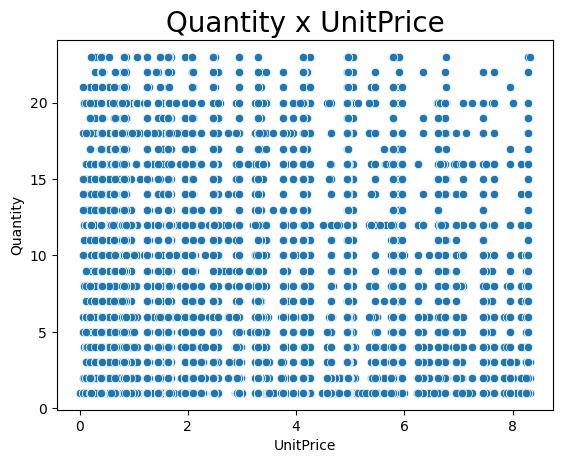

In [11]:
dx = df[df['Quantity']>0] 
dy = df[df['UnitPrice']>0] 

filtered_quantity = dx.query('(@q1_quan - 1.5 * @iqr_quan) <= Quantity <= (@q3_quan + 1.5 * @iqr_quan)')
filtered_unitprice = dy.query('(@q1_unit - 1.5 * @iqr_unit) <= UnitPrice <= (@q3_unit + 1.5 * @iqr_unit)')

sns.scatterplot(x = filtered_unitprice['UnitPrice'], y = filtered_quantity['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20);

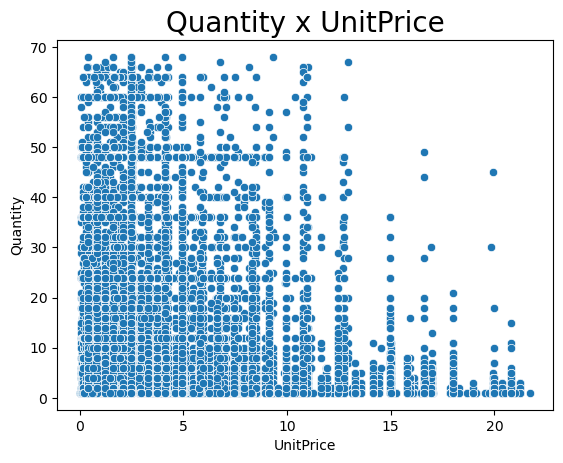

In [12]:
q1_quan_custom = df['Quantity'].quantile(0.5)
q3_quan_custom = df['Quantity'].quantile(0.95)
iqr_quan_custom = q3_quan_custom - q1_quan_custom

q1_unit_custom = df['UnitPrice'].quantile(0.5)
q3_unit_custom = df['UnitPrice'].quantile(0.95)
iqr_unit_custom = q3_unit_custom - q1_unit_custom

dx = df[df['Quantity']>0] #hilangkan value negatif
dy = df[df['UnitPrice']>0] #hilangkan value negatif

filtered_quantity = dx.query('(@q1_quan_custom - 1.5 * @iqr_quan_custom) <= Quantity <= (@q3_quan_custom + 1.5 * @iqr_quan_custom)')
filtered_unitprice = dy.query('(@q1_unit_custom - 1.5 * @iqr_unit_custom) <= UnitPrice <= (@q3_unit_custom + 1.5 * @iqr_unit_custom)')

sns.scatterplot(x = filtered_unitprice['UnitPrice'], y = filtered_quantity['Quantity'])

plt.title('Quantity x UnitPrice', fontsize = 20);

In [41]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Revenue      541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [50]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Revenue        float64
dtype: object

In [60]:
X = df.iloc[:,[5,8]].values

In [62]:
X.shape

(541909, 2)

In [63]:
from sklearn.cluster import KMeans
wcss = []

In [68]:
n_samples = len(X)  # Number of samples in your dataset
for i in range(1, min(n_samples + 1, 11)):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init= 10)
    kmeans.fit(X)
    # Append the inertia (within-cluster sum of squares) to the list
    wcss.append(kmeans.inertia_)

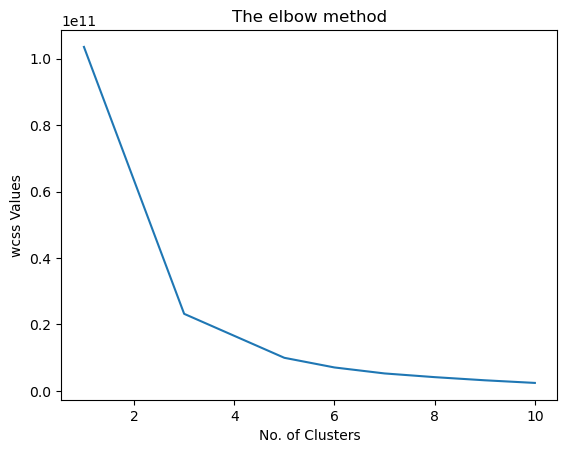

In [54]:
plt.plot(range(1, len(wcss) + 1), wcss)
plt.title('The elbow method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss Values')
plt.show()

In [35]:
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0 , n_init = 10)

In [69]:
y_kmeans = kmeansmodel.fit_predict(X)

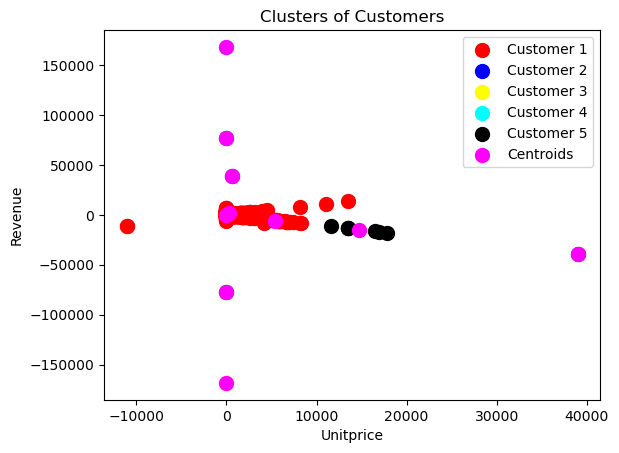

In [73]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0, 1], s=100, c = "red", label = "Customer 1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1, 1], s=100, c = "blue", label = "Customer 2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2, 1], s=100, c = "yellow", label = "Customer 3")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3, 1], s=100, c = "cyan", label = "Customer 4")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4, 1], s=100, c = "black", label = "Customer 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s= 100, c = "magenta", label = 'Centroids')
plt.title("Clusters of Customers")
plt.xlabel("Unitprice")
plt.ylabel("Revenue")
plt.legend()
plt.show()